# Исследование продаж компьютерных игр.
    Описание проекта: Интернет магазин «Стримчик» поставил задачу провести исследование по продажам различных категорий игр.
    Цель исследования выявить закономерности, перспективные направления и оценить успешность различных направлений компьютерных игр, а так же выработка стратегии на будующий год. \Исходные данные полученны из открытых источников за период с 1985 по 2016.
    Цель исследования: Выявить закономерности между прибылью и определенных жанров компьютерных игр, так же оценить влияние комьюнити на продажи, и влияние критиков. Проверить несколько гипотез о зависимости прибыли от определенных жанров, и оценок которые ставят критики и пользователи за выбранный актуальный период.
    Ход исследования: 
        - Подготовка данных: Загрузка библиотек, изучение общей информации о датафрейме и данных в нем содержащихся.
        - Предобработка данных: Проверить данные на дупликаты, обработать пропущенные значения при возмможности, привести данные к читаемому и понимаемому виду.
        - Добавить нужные колонки(в данном случае одну с общей прибылью всех регионов)
        
    Исследовательский анализ данных: 
        - Оценить доходность игр по платформам, выявить топ 5 современных платформ для более актуального анализа данных.
        - Оценить влияния оценок на прибыльность, выявить топ 5 жанров игр по прибыльности.
        - Сформировать и проверить гипотезы.
            
    Общий вывод: Описать полученные результаты, сформулировать рекомендации и направление развития компании на следущий год.
        
    
    

## Импортируем библиотеки, откроем и посмотрим на данные:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
print(df.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Вывод:
1. Всего в датафрейме 16715 строк и 11 колонок.\
2. В некоторых колонках тип данных не соответсвует написанному(Year_of_Release, User_Score)\
3. В колонках есть пропуски.
4. Названия колонок имеет как заглавные так и строчные буквы.

##  Обработка данных:

### Приведем колонки к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

### Удалим дупликаты и заменим пропуски в колонках

In [6]:
df.duplicated().sum()

0

Проверим на неявные дупликаты.

In [7]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])

In [9]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [10]:
df.isna().sum() #Посмотрим кол-во пропусков в строках.

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [11]:
print('Кол-во пропусков в колонке name составляет',((df['name'].isna().sum()/len(df['name']))*100).round(3),'% от общего числа')     

Кол-во пропусков в колонке name составляет 0.006 % от общего числа


In [12]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Можем убрать их из дата фрейма

In [13]:
df = df.dropna(subset=['name']) #Убрал строки с пропусками по столбцу name

In [14]:
print('Кол-во пропусков в колонке genre составляет',((df['genre'].isna().sum()/len(df['genre']))*100).round(3),'% от общего числа')

Кол-во пропусков в колонке genre составляет 0.0 % от общего числа


Пропуски в колонке genre оказались там же, где и пропуски в колонке name. Повезло.

In [15]:
print('Кол-во пропусков в колонке genre составляет',((df['year_of_release'].isna().sum()/len(df['year_of_release']))*100).round(3),'% от общего числа')

Кол-во пропусков в колонке genre составляет 1.61 % от общего числа


Пропусков достаточно мало, и на итоговые выводы вряд ли повлияют уберем их.

In [16]:
df = df.dropna(subset=['year_of_release'])

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [18]:
print(df['critic_score'].unique())
print(df['user_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Так как нам ничего не известно про значение tbd заменим его на Nan

In [19]:
df=df.replace({'tbd':np.NaN})

In [20]:
print('Кол-во пропусков в колонке critic_score составляет',
      ((df['critic_score'].isna().sum()/len(df['critic_score']))*100).round(3),'% от общего числа')
print('Кол-во пропусков в колонке user_score составляет',
      ((df['user_score'].isna().sum()/len(df['user_score']))*100).round(3),'% от общего числа')

Кол-во пропусков в колонке critic_score составляет 51.457 % от общего числа
Кол-во пропусков в колонке user_score составляет 54.619 % от общего числа


Кол-во пропусков в колонках critic_score, user_score, достаточно большое, и заменять их на медианные или среднии значение не актуально, так как это создаст огромный пик на графиках.

In [21]:
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Пропуски в возрастном рейтинге заменим на 'unknown'

In [22]:
df['rating'] = df['rating'].fillna('unknown')

In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Поменяем формат некоторых колонок

In [24]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float64')

Заменим форматы в колонках для построения различных диаграм и графиков.
1. В колонке year_of_release заменим на целостное значение, так как год не может быть дробным.
2. В колонках user_score заменим на формат float64, так как в данных есть значения Nan и есть дробные значения.

### Посчитаем сумарные продажи во всех регионах.

In [25]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [26]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


# Вывод по разделу:
1. Привел названия колонок к нижнему регистру.
2. Проверил на наличие явных дубликатов.
3. Заменил пропуски в тех колонках, где это возможно. Убрал неизвестные данные (tbd), преобразовав их в Nan.
4. Изменил формат некоторых колонок для удобства.
5. Добавил колонку с суммарными продажами во всех регионах.
# Почему могли появится пропуски:
 1. Пропуски в названиях игр и в жанре могли появится из-за человеческого фактора(Просто не указали) так как таких пропусков крайне мало.
 2. Пропуски же в значениях рейтинговых оценок критиками и пользователями могли возникнуть из за того, что информация бралась из определенного ресурса на котором этих данных нет, потому что до определенного момента такой учет рейтинга не велся.
 3. Пропуски в возрастном рейтинге могли возникнуть, по причине отсутсвия таких критериев в момент выхода игры или же с незаполнением данных человеком.

## Исследовательский анализ данных:

### Проведем анализ кол-ва вышедших игр по годам:

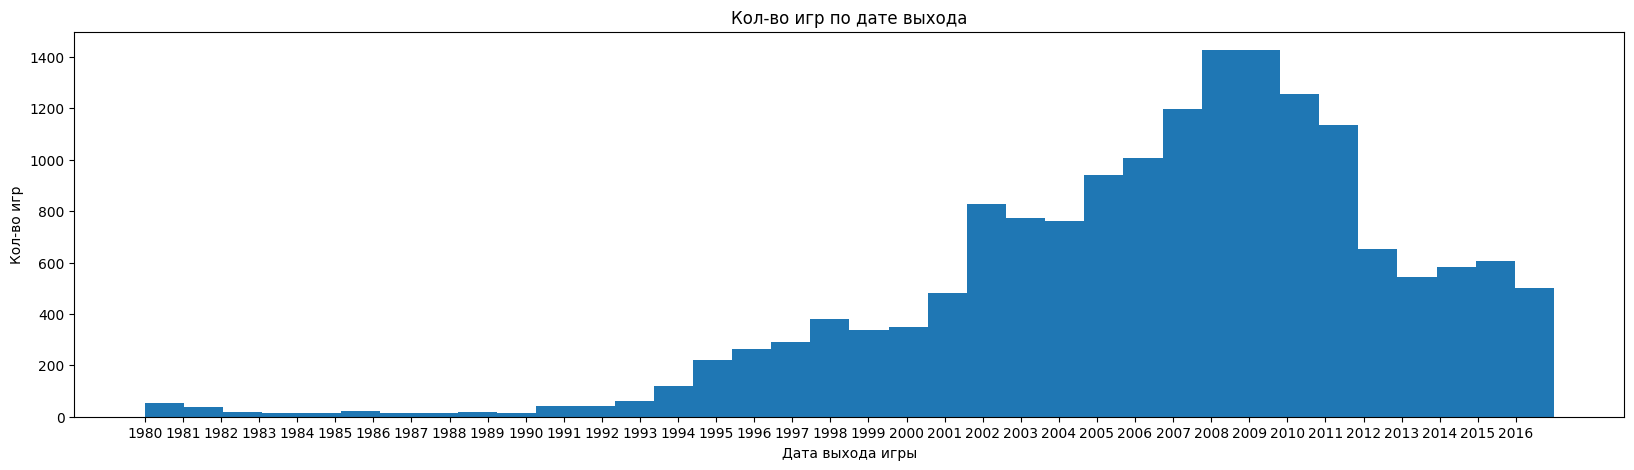

In [27]:
plt.rcParams["figure.figsize"] = (20,5)
plt.hist(df['year_of_release'], bins=36, range=(1980,2017))
plt.title('Кол-во игр по дате выхода')
plt.xlabel('Дата выхода игры')
plt.ylabel('Кол-во игр')
plt.xticks(np.arange(min(df['year_of_release']), max(df['year_of_release'])+1, 1.0))
plt.show()

По гистограмме видно, что пик выхода игр приходится на 2008-2009 года. Так же мы видим что до 1991 года выходило очень мало игр.

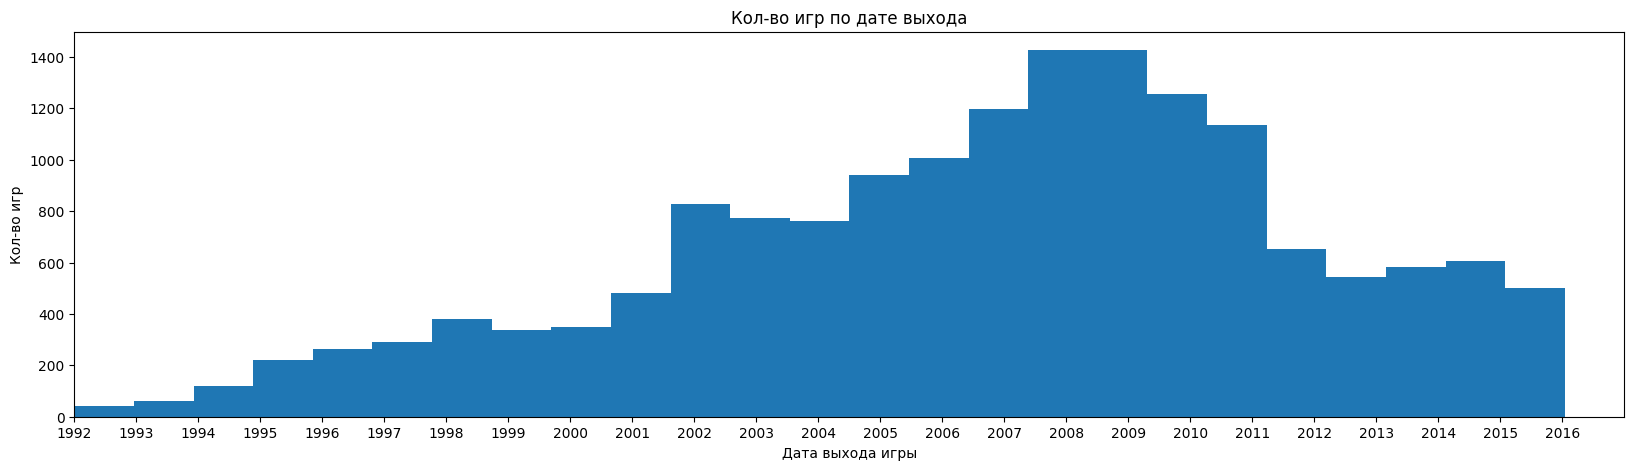

In [28]:
plt.rcParams["figure.figsize"] = (20,5)
plt.hist(df['year_of_release'], bins=26, range=(1992,2017))
plt.title('Кол-во игр по дате выхода')
plt.xlabel('Дата выхода игры')
plt.ylabel('Кол-во игр')
plt.xticks(np.arange(min(df['year_of_release']), max(df['year_of_release'])+1, 1.0))
plt.xlim(1992,2017)
plt.show()

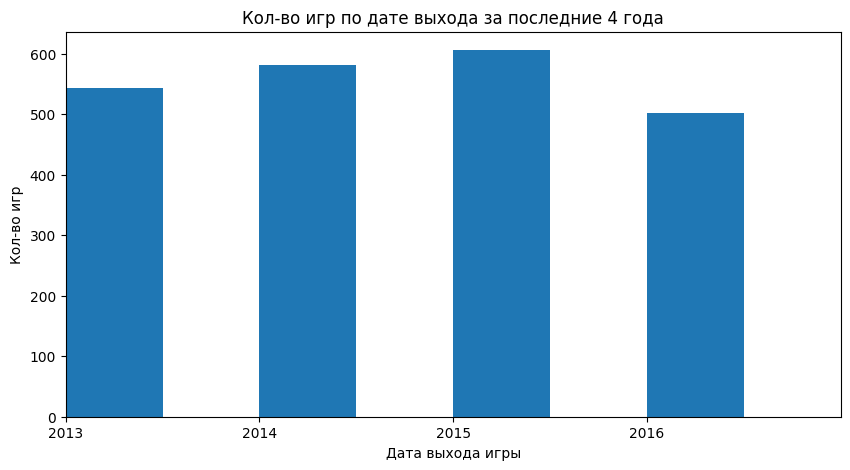

In [29]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(df['year_of_release'], bins=8, range=(2013,2017))
plt.title('Кол-во игр по дате выхода за последние 4 года')
plt.xlabel('Дата выхода игры')
plt.ylabel('Кол-во игр')
plt.xticks(np.arange(min(df['year_of_release']), max(df['year_of_release'])+1, 1.0))
plt.xlim(2013,2017)
plt.show()

### Проведем анализ прибыльности игр по платформам

In [30]:
sales_by_platform = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                     .reset_index()
                     .sort_values(by='total_sales',ascending=False)
                    )

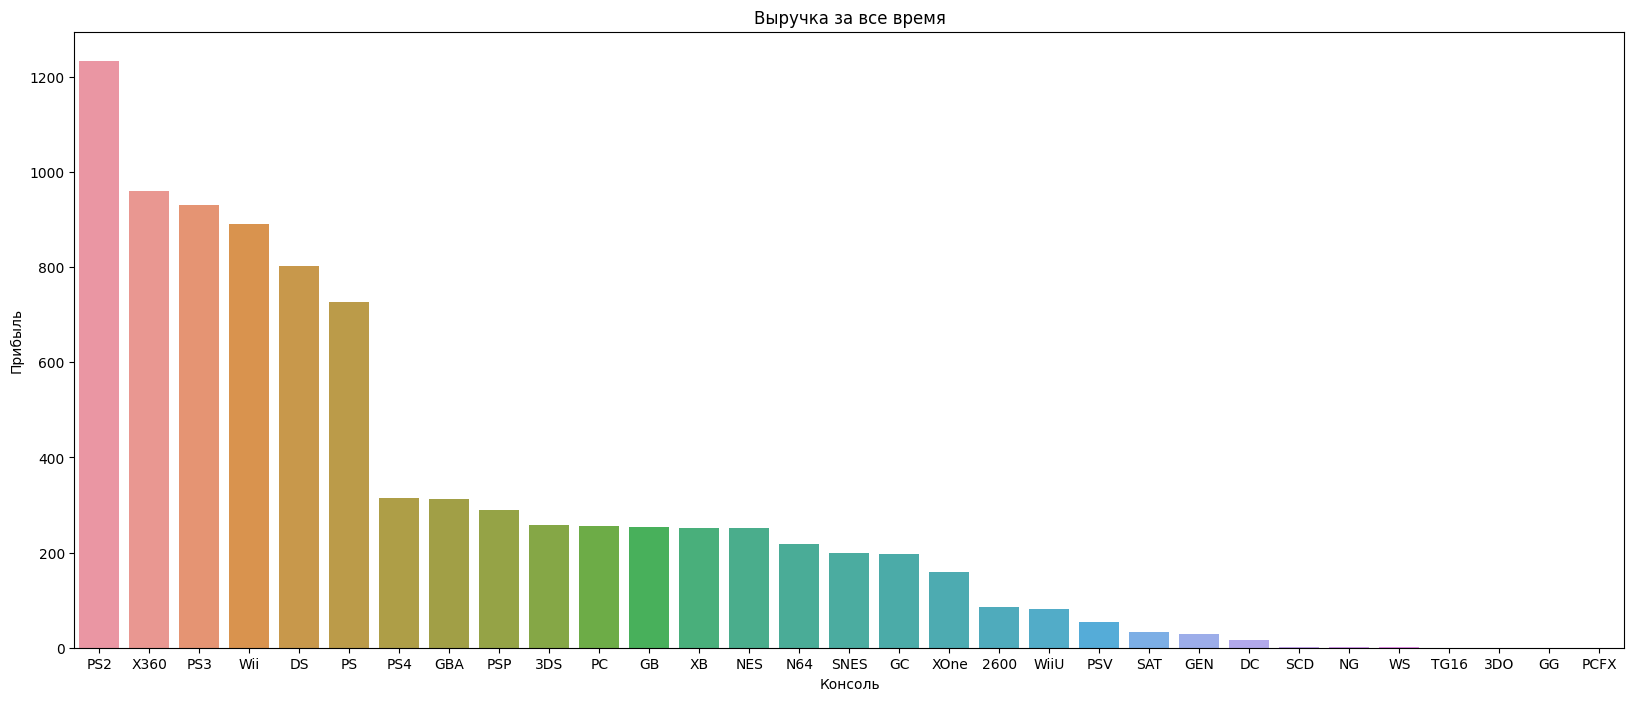

In [31]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=sales_by_platform['platform'], y=sales_by_platform['total_sales'], data=sales_by_platform);
plt.title('Выручка за все время')
plt.ylabel('Прибыль')
plt.xlabel('Консоль')
plt.show()

По графику видно, что наибольшую прибыль принесла консоль PS2, за ней идут X360, PS3, Wii, DS, PS.\
Далее видим кратное уменьшение прибыли.
Актуальными данными приму значения за последние 5-10 лет, поскольку с 2006 года заметен сильный рост кол-ва выпускаемых игр, при этом с 2011 года мы видим, что кол-во выпускаемых игр снизилось, но из года в год остается на одном и том же уровне.


In [32]:
top_sales_by_platform = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                         .sort_values(by='total_sales', ascending=False)
                         .reset_index().head(6)['platform']
                         .tolist()
                        )

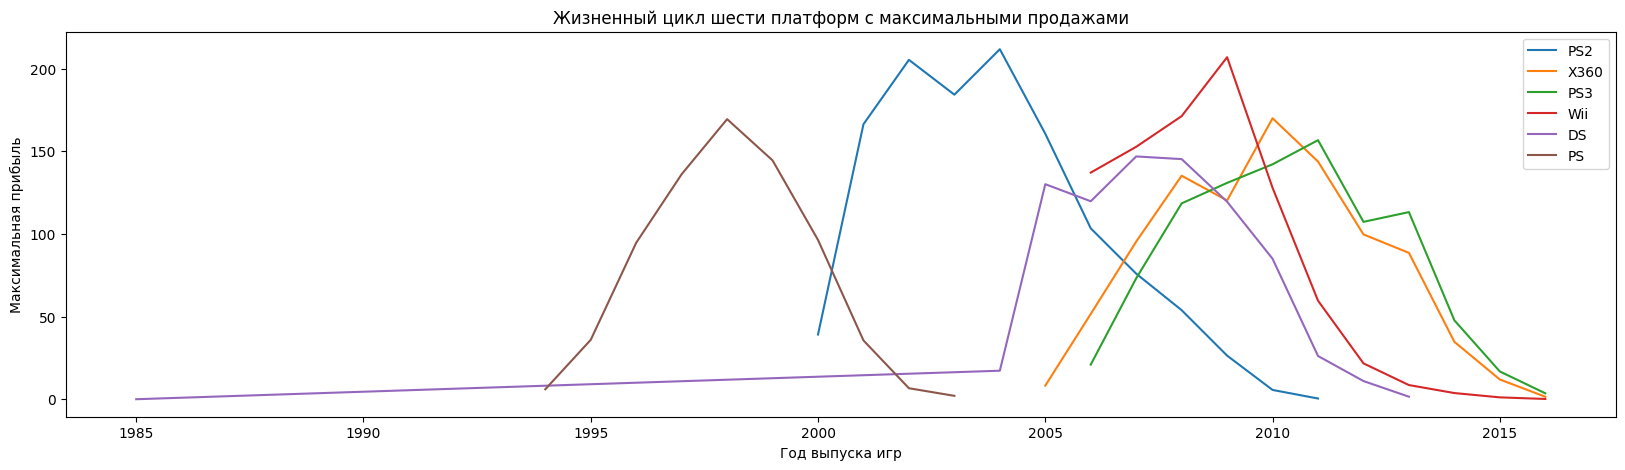

In [33]:
plt.rcParams["figure.figsize"] = (20,5)
for name in top_sales_by_platform:
    (
    df.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (20, 5), label=name)
    )
    
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Максимальная прибыль')
    plt.legend() 


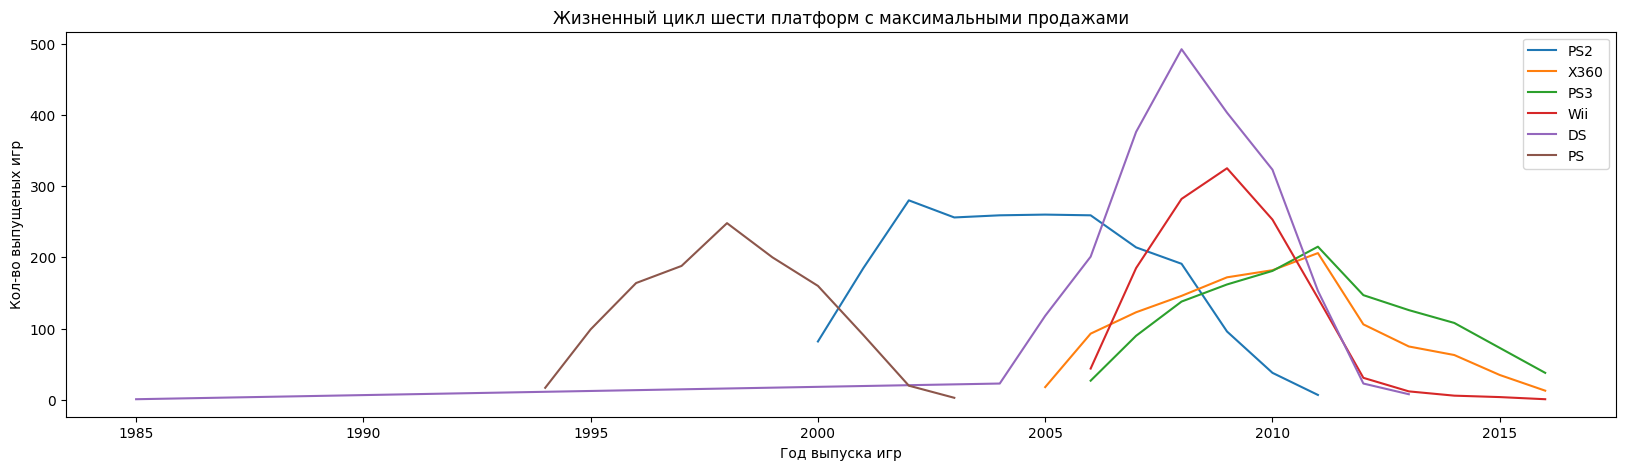

In [34]:
plt.rcParams["figure.figsize"] = (20,5)
for name in top_sales_by_platform:
    (
    df.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (20, 5), label=name)
    )
    
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Кол-во выпущеных игр')
    plt.legend() 


По графику видим аномальные значения для платформы DS, как будто с 1985 по 2004 года игры не продавались для этой платформы при том, что сама платформа вышла только в 2004 году.

In [35]:
df.query("platform == 'DS' and year_of_release < 2004")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Действительно есть одна запись, за 1985 год. Уберем ее так как она дает не правильную информацию.

In [36]:
df.drop(index=15957, inplace=True)

In [37]:
df.query("platform == 'DS' and year_of_release < 2004")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


По графикам видно, что консоли в среднем актуальны в течении 10 лет, за исключение консоли DS, которая с момента выхода получила свой пик продаж только к 2007 году. По продажам самих игр можно заметить тенденцию к снижению продаж по самым прибыльным консолям, что вызванно выходом новых версий консолей. Актуальный период возьму с 2011 года. А так же уберем консоли более старокого покаления которые попадают в диапазон с 2011 по 2016 год. По скольку старые консоли с этого времени начинают становится менее успешными.

### Проведем анализ прибыльности по актуальным данным(За последние 4 года)

In [38]:
df_current = (df.query("year_of_release > 2012 & platform != 'Wii' & platform != 'PSP' ")
     .reset_index())

In [39]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2143 non-null   int64  
 1   name             2143 non-null   object 
 2   platform         2143 non-null   object 
 3   year_of_release  2143 non-null   int32  
 4   genre            2143 non-null   object 
 5   na_sales         2143 non-null   float64
 6   eu_sales         2143 non-null   float64
 7   jp_sales         2143 non-null   float64
 8   other_sales      2143 non-null   float64
 9   critic_score     990 non-null    float64
 10  user_score       1183 non-null   float64
 11  rating           2143 non-null   object 
 12  total_sales      2143 non-null   float64
dtypes: float64(7), int32(1), int64(1), object(4)
memory usage: 209.4+ KB


In [40]:
df_current['total_sales'] = df_current['na_sales']+df_current['eu_sales']+df_current['jp_sales']+df_current['other_sales']

In [41]:
current_sales = (df_current.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                     .reset_index()
                     .sort_values(by='total_sales',ascending=False)
                    )

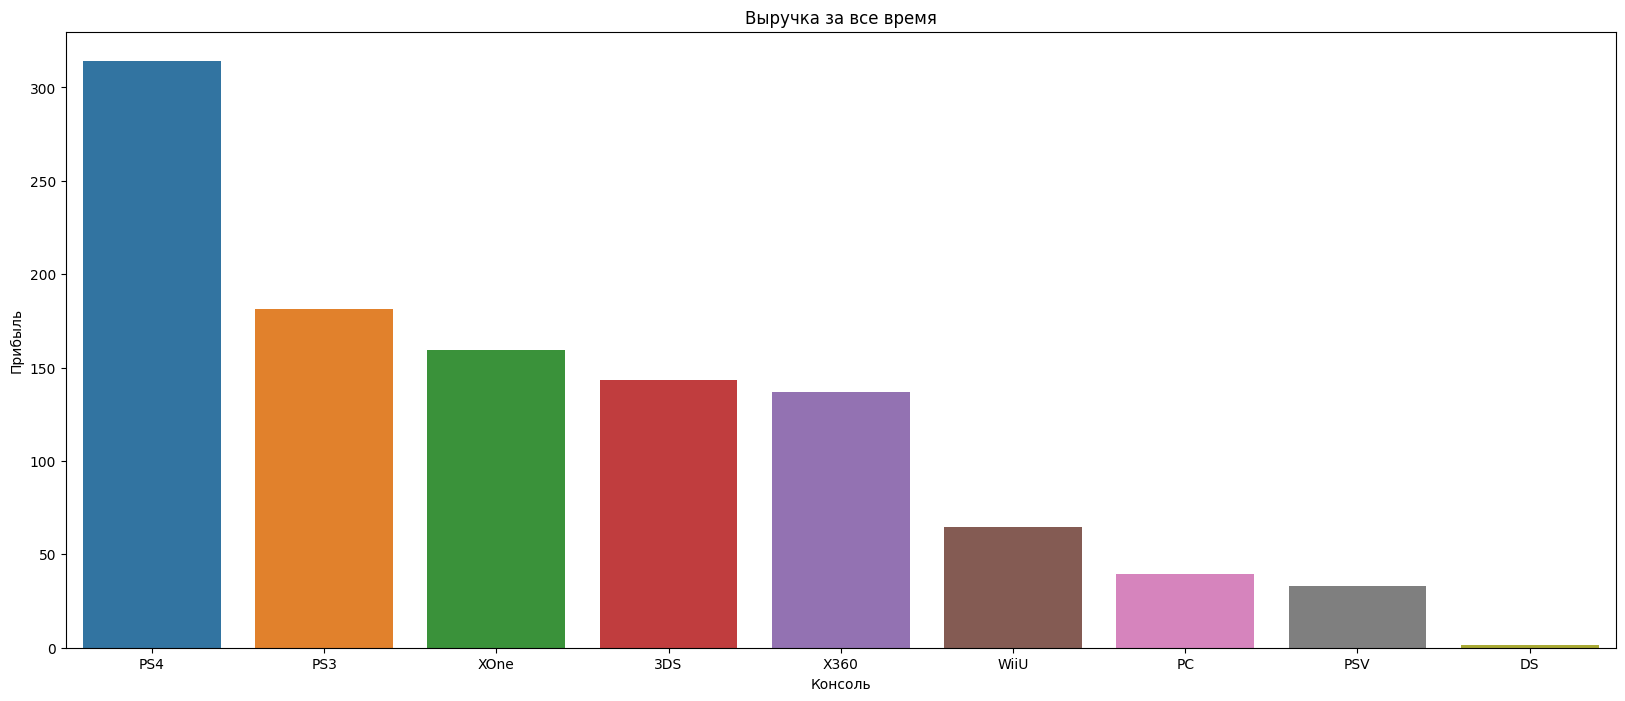

In [42]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=current_sales['platform'], y=current_sales['total_sales'], data=current_sales);
plt.title('Выручка за все время')
plt.ylabel('Прибыль')
plt.xlabel('Консоль')
plt.show()

In [43]:
top_current_sales_by_platform = (df_current.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                         .sort_values(by='total_sales', ascending=False)
                         .reset_index().head(5)['platform']
                         .tolist()
                        )

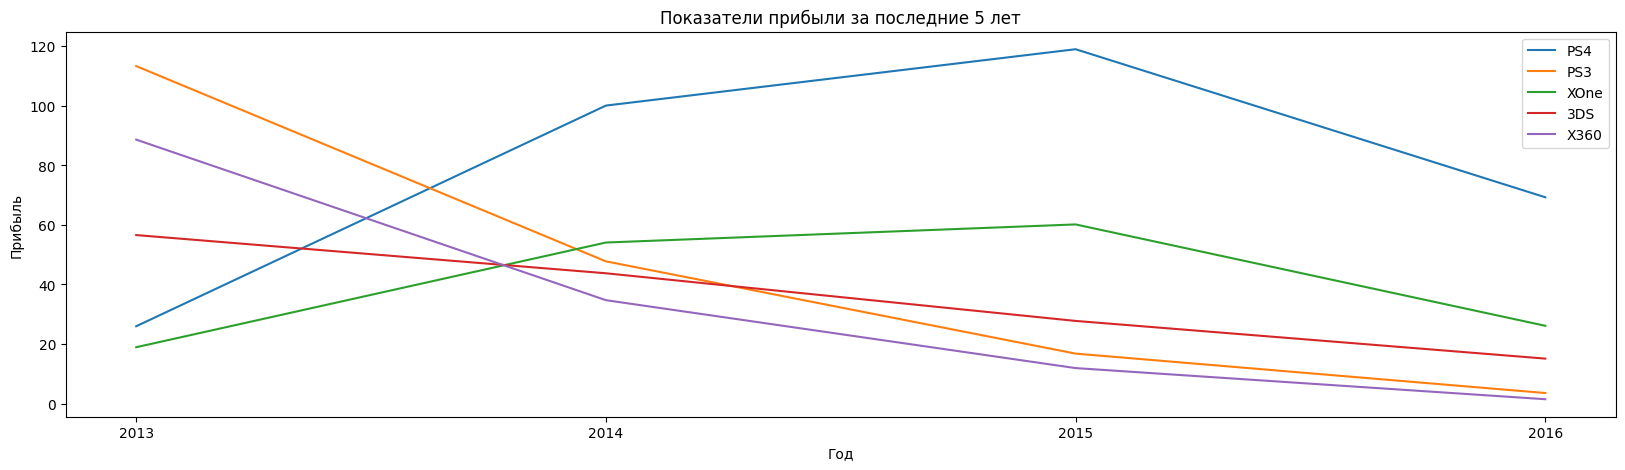

In [44]:
for name in top_current_sales_by_platform:
    (
    df_current.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (20, 5), label=name)
    )
    
    plt.title('Показатели прибыли за последние 5 лет')
    plt.xlabel('Год')
    plt.ylabel('Прибыль')
    plt.xticks(np.arange(min(df_current['year_of_release']), max(df_current['year_of_release'])+1, 1.0))
    plt.legend() 

Как видно на графике, продажи игр с 2013 года падают, достаточно на высоком уровне продажи только у 3 консолей PS4, XboxOne.

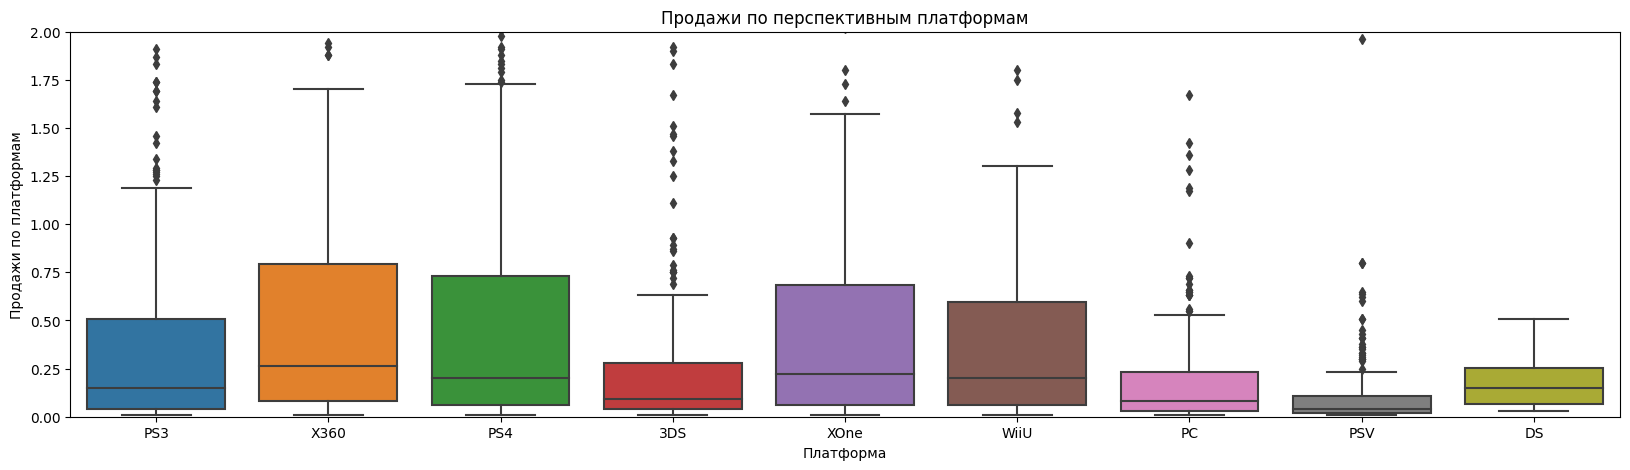

In [45]:
ax = sns.boxplot(data=df_current, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title(f'Продажи по перспективным платформам')
plt.xlabel(f'Платформа')
plt.ylabel(f'Продажи по платформам')
plt.show()

In [46]:
df_current['total_sales'].describe()

count    2143.000000
mean        0.500947
std         1.254969
min         0.010000
25%         0.040000
50%         0.120000
75%         0.420000
max        21.050000
Name: total_sales, dtype: float64

По диаграмме и средним показателям можно сказать следующие:
1. Среднее значение прыбыли 0.500
2. Медианые значения большинства консолей не дотягивают до этого значения.

### Проведем анализ влияния оценок пользователей и критиков на прибыль:

In [47]:
cor_critic = df_current['total_sales'].corr(df_current['critic_score'])
cor_critic

0.31378891013587495

In [48]:
cor_user = df_current['total_sales'].corr(df_current['user_score'])
cor_user

-0.0035063285790420066

Как мы видим, кореляция между оценками критиков и продажами, имеет зависимость, хоть и не большую примерно 0.3.\
В это же время прибыль не зависит от оценок пользователей.\
Рассмотрим кореляцию по отдельным платформам:

Корреляция между оценками критиков и продажами по платформе PS4  = 0.4065679020617816


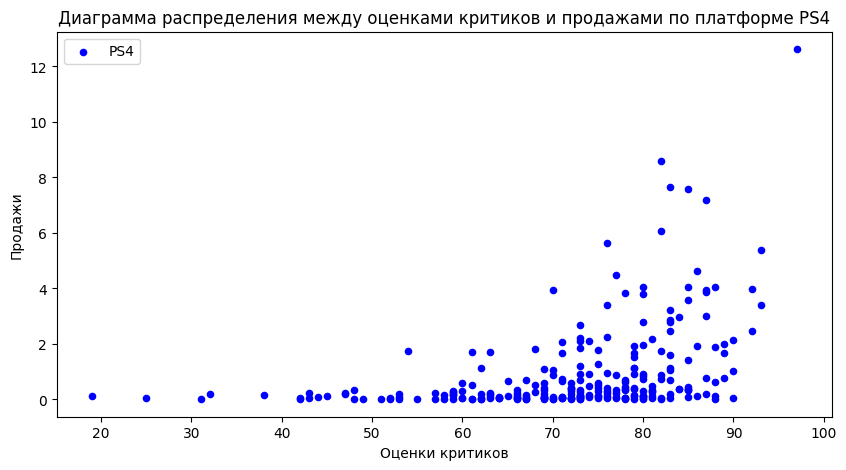

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3342853393371919


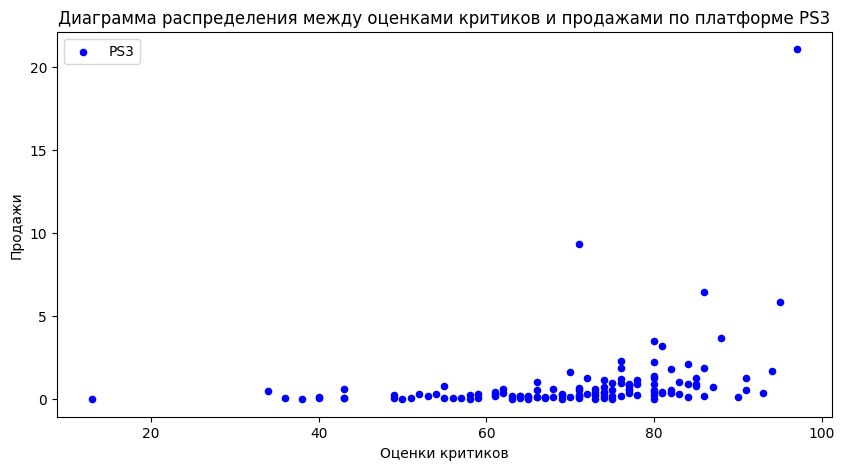

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


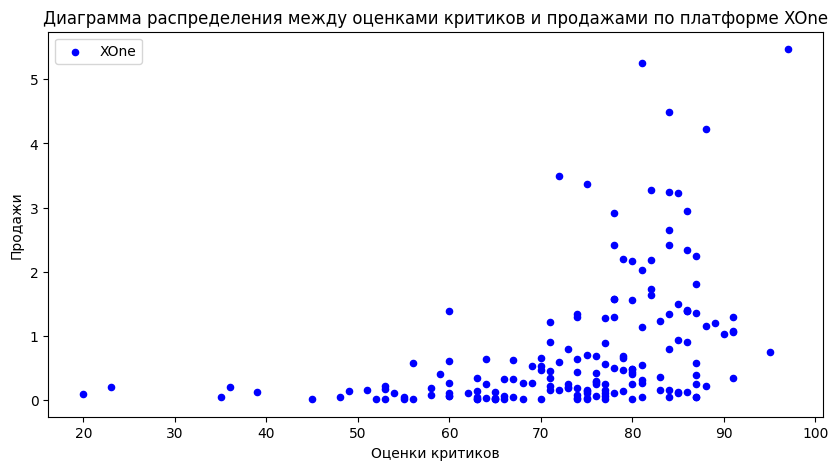

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3570566142288103


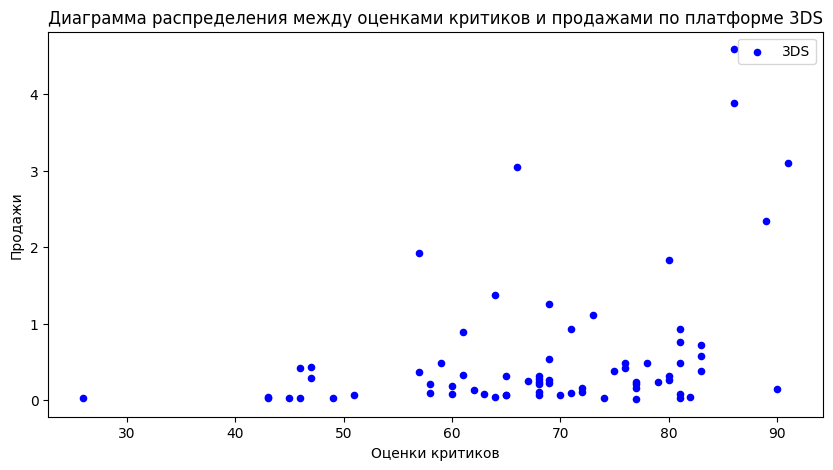

Корреляция между оценками критиков и продажами по платформе X360  = 0.3503445460228664


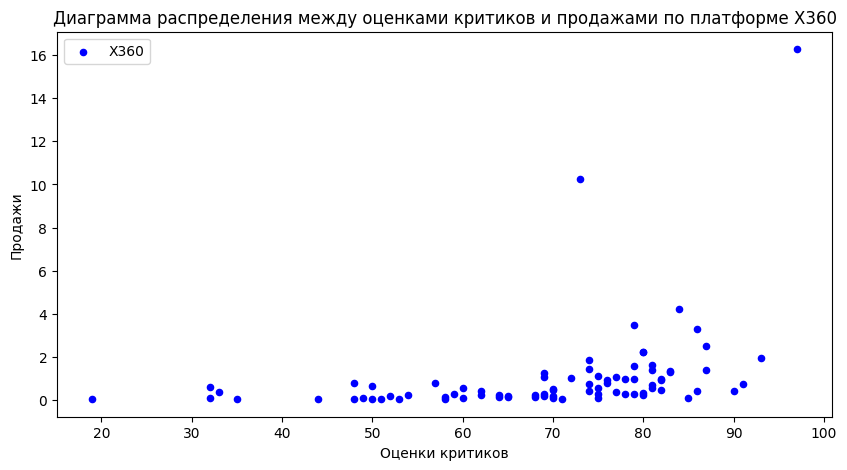

In [49]:
for name in top_current_sales_by_platform:
    (
    df_current
        .query('platform == @name')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
    )
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками критиков и продажами по платформе {name}  =', df_current.query('platform == @name')['critic_score'].corr(df_current.query('platform == @name')['total_sales']))
         
    plt.show()

Как видно по анализу, оценки критиков на топ-5 платформах сдержанно влияют на прибыль, а на платформе PSV почти не оказывают влияния.\
Сделаем тоже самое для оценок пользователей:

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.03195711020455643


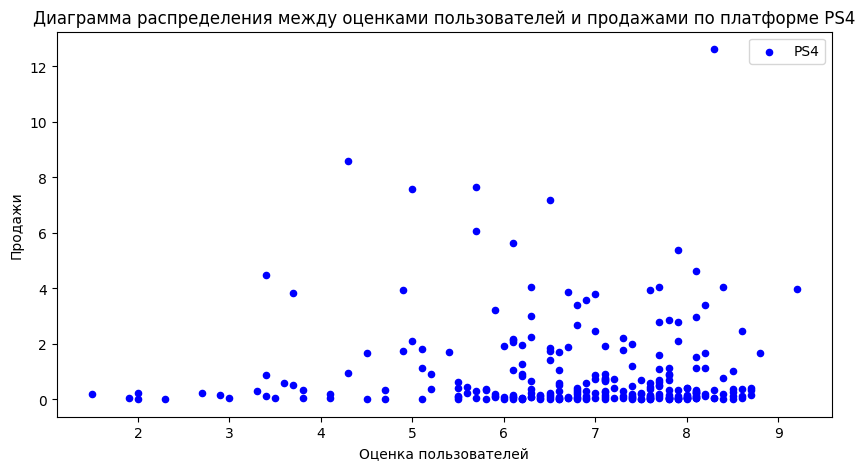

Корреляция между оценками пользователей и продажами по платформе PS3  = 0.0023944027357566907


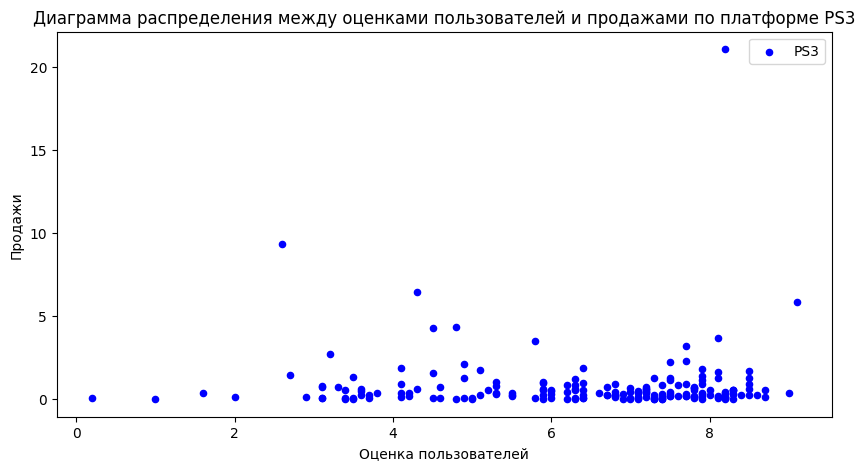

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279416


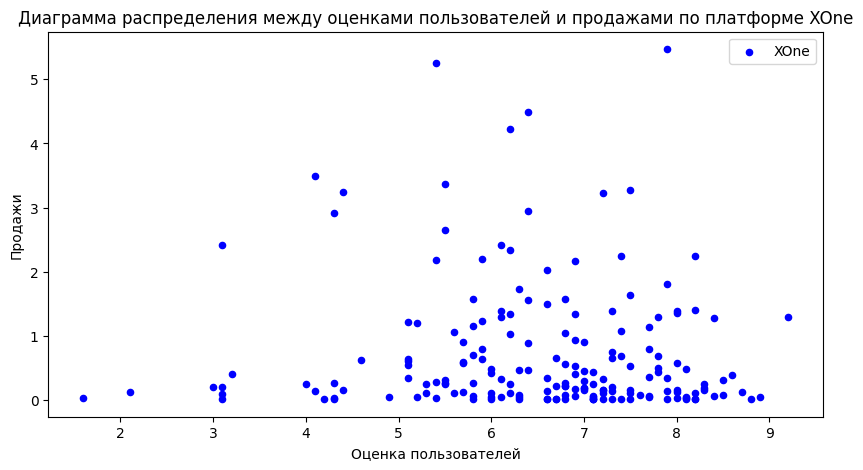

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.24150411773563016


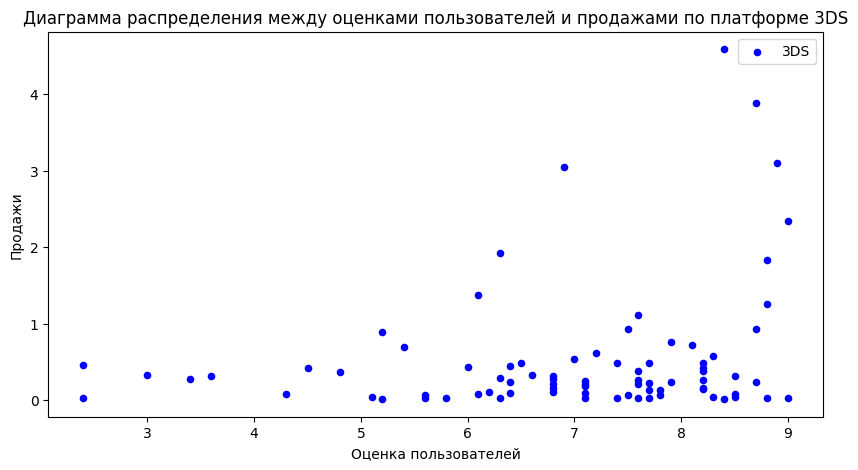

Корреляция между оценками пользователей и продажами по платформе X360  = -0.011742185147181351


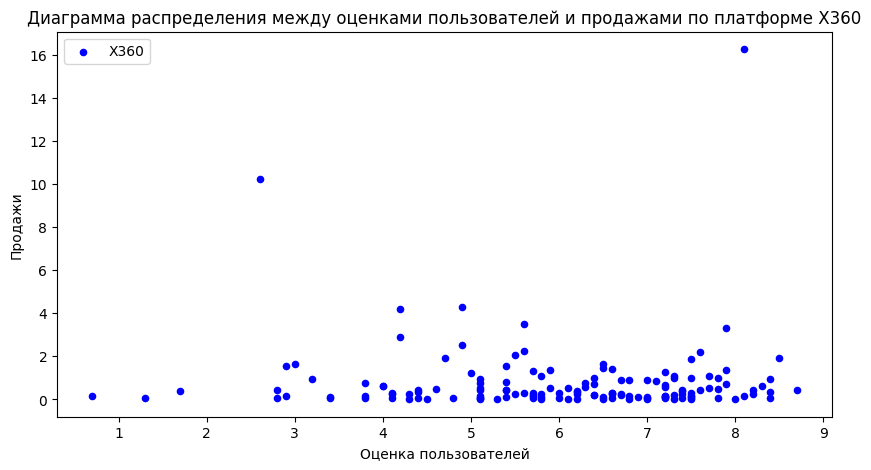

In [50]:
for name in top_current_sales_by_platform:
    (
    df_current
        .query('platform == @name')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
    )
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками пользователей и продажами по платформе {name}  =', df_current.query('platform == @name')['user_score'].corr(df_current.query('platform == @name')['total_sales']))
         
    plt.show()

Как видно по анализу, оценки пользователей либов влияют очень слабо, либо совсем не влияют на прибыль, среди всех платформ выделятся только WiiU с значение 0.4, что показывает что на этой платформе отзывы пользователей все таки немного, но влияют на прибыльность.\
Составим распределение прибыли по жанрам:

### Проведем анализ прибыльности по жанрам игр:

In [51]:
genre_sale = (df_current
              .pivot_table(index = 'genre', values = 'total_sales', aggfunc=('sum', 'median'))
              .sort_values(by='sum', ascending=False)
              .reset_index()
             )
genre_sale

,genre,median,sum
0,Action,0.110,318.19
1,Shooter,0.450,232.98
2,Sports,0.240,149.01
3,Role-Playing,0.120,144.86
4,Misc,0.110,55.59
5,Platform,0.225,40.38
6,Racing,0.120,39.89
7,Fighting,0.130,35.29
8,Adventure,0.030,22.75
9,Simulation,0.100,21.62


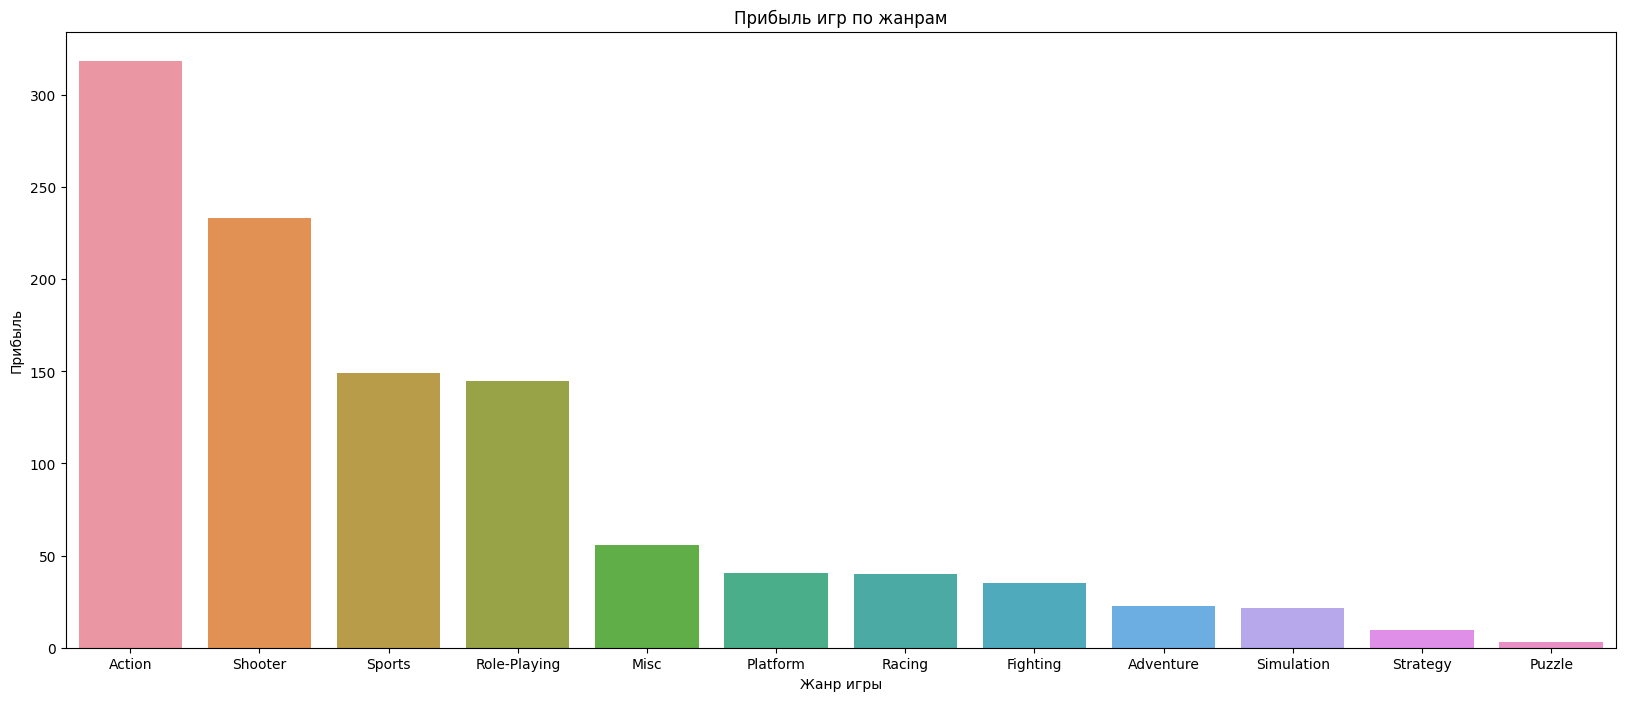

In [52]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=genre_sale['genre'], y=genre_sale['sum'], data=genre_sale);
plt.title('Прибыль игр по жанрам')
plt.ylabel('Прибыль')
plt.xlabel('Жанр игры')
plt.show()

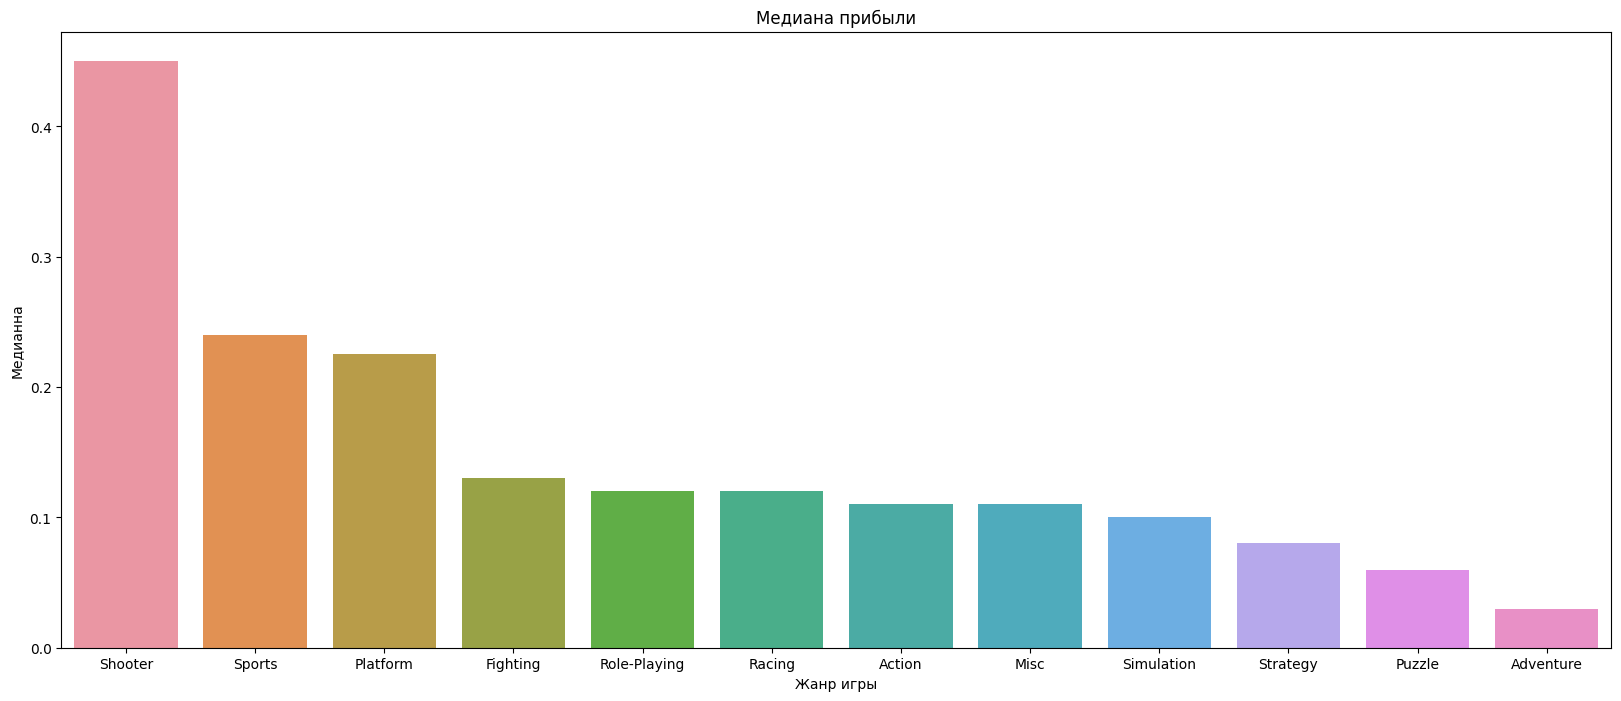

In [53]:
genre_sale = genre_sale.sort_values(by='median',ascending=False)
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=genre_sale['genre'], y=genre_sale['median'], data=genre_sale);
plt.title('Медиана прибыли')
plt.ylabel('Медианна')
plt.xlabel('Жанр игры')
plt.show()

Как видно по анализу, самым прибыльным жанром является жанр Action и Shooter, а самым не прибыльным strategy и Puzzle.\
В тоже время медианна прибыли самая высока у Shooter, что позволяет предполагать это направление более перспективным чем Action.

# Вывод по разделу:
1. За все время наблюдения самой прибыльной консолью была PS2.
2. Среднее время жизни консоли 10 лет, далее она становится не актуальной из за выхода более новых версий.
3. Показатели прибыли за последние годы падают каждый отчетный период.
4. За актуальный период (последние 6 лет) наибольшую прибыль показывает PS3, Xbox360 и PS4.
5. Оценки игр пользователей почти не влияют на прибыльность.
6. Оценки игр критиками оказывают среднее влияние на прибыльность.
7. Самый прибыльный жанр Action.
8. Самый перспективное направление в играх Shooter.

## Составим портрет пользователя

### Посмотрим на самые популярные платформы в регионах

In [54]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2143 non-null   int64  
 1   name             2143 non-null   object 
 2   platform         2143 non-null   object 
 3   year_of_release  2143 non-null   int32  
 4   genre            2143 non-null   object 
 5   na_sales         2143 non-null   float64
 6   eu_sales         2143 non-null   float64
 7   jp_sales         2143 non-null   float64
 8   other_sales      2143 non-null   float64
 9   critic_score     990 non-null    float64
 10  user_score       1183 non-null   float64
 11  rating           2143 non-null   object 
 12  total_sales      2143 non-null   float64
dtypes: float64(7), int32(1), int64(1), object(4)
memory usage: 209.4+ KB


In [55]:
typical_user_na = df_current.pivot_table(index='platform',values='na_sales', aggfunc='sum').reset_index().sort_values('platform', ascending=False)
typical_user_eu = df_current.pivot_table(index='platform',values='eu_sales', aggfunc='sum').reset_index().sort_values('platform', ascending=False)
typical_user_jp = df_current.pivot_table(index='platform',values='jp_sales', aggfunc='sum').reset_index().sort_values('platform', ascending=False)

In [56]:
share_of_sales = pd.merge(pd.merge(typical_user_na, typical_user_eu,how='left'), typical_user_jp, how='left')

In [57]:
share_of_sales['sum'] = share_of_sales['na_sales']+share_of_sales['eu_sales']+share_of_sales['jp_sales']

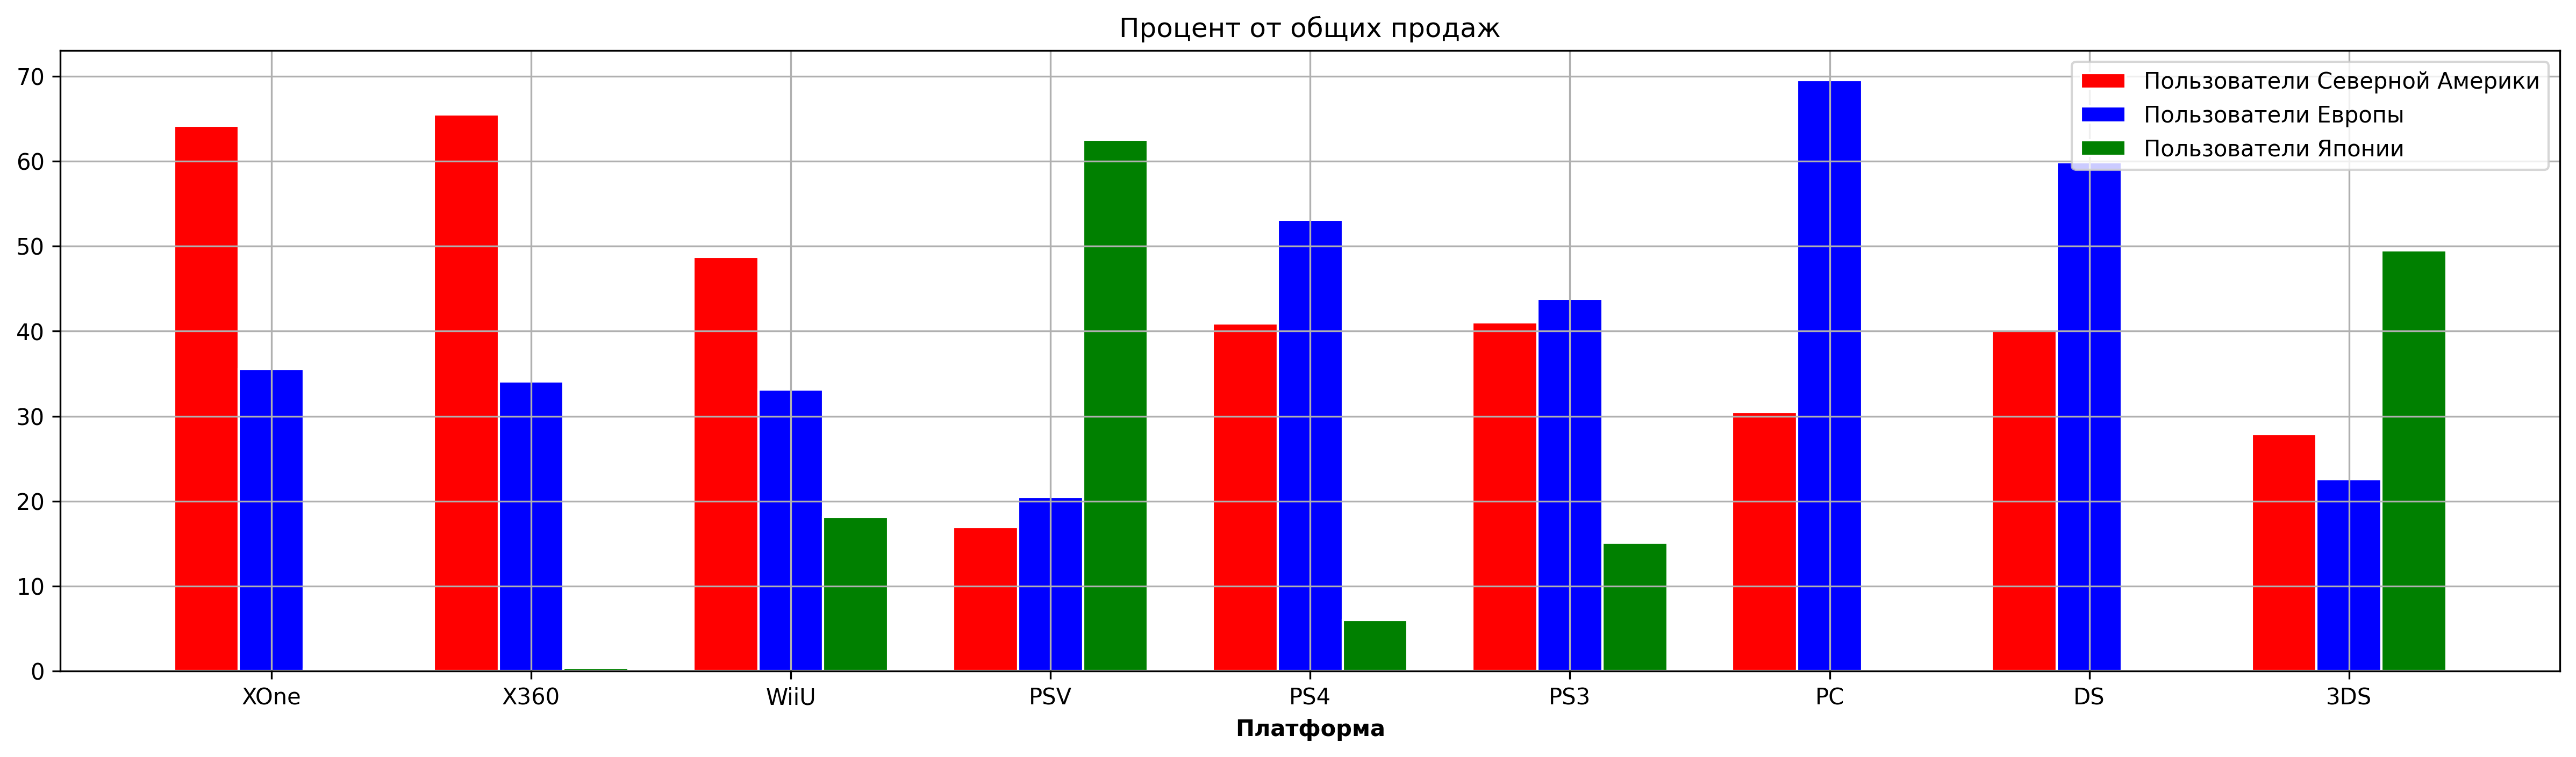

In [58]:
barWidth = 0.25
bars1 = share_of_sales['na_sales'] / share_of_sales['sum'] *100
bars2 = share_of_sales['eu_sales'] / share_of_sales['sum'] *100
bars3 = share_of_sales['jp_sales'] / share_of_sales['sum'] *100

r = np.arange(len(bars1))
r2 = r + barWidth
r3 = r2 + barWidth

fig, ax = plt.subplots(dpi=300)
ax.bar(r, bars1, color='red', width=barWidth, edgecolor='white', label='Пользователи Северной Америки')
ax.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Пользователи Европы')
ax.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Пользователи Японии')
plt.title('Процент от общих продаж')


ax.set_xlabel('Платформа', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(typical_user_na['platform'])
ax.grid()

ax.legend()
plt.show()

Глядя на график выводы:
Почти на всех платформах из топ 5 большую прибыль приносит Северная Америка (более 50% на платформа Wii, X360, XOne), за исключением платформы PSV где более 40% продаж приходится на Японию. 

### Проанализирум данные о продажах топ 5 платформ в регионах.

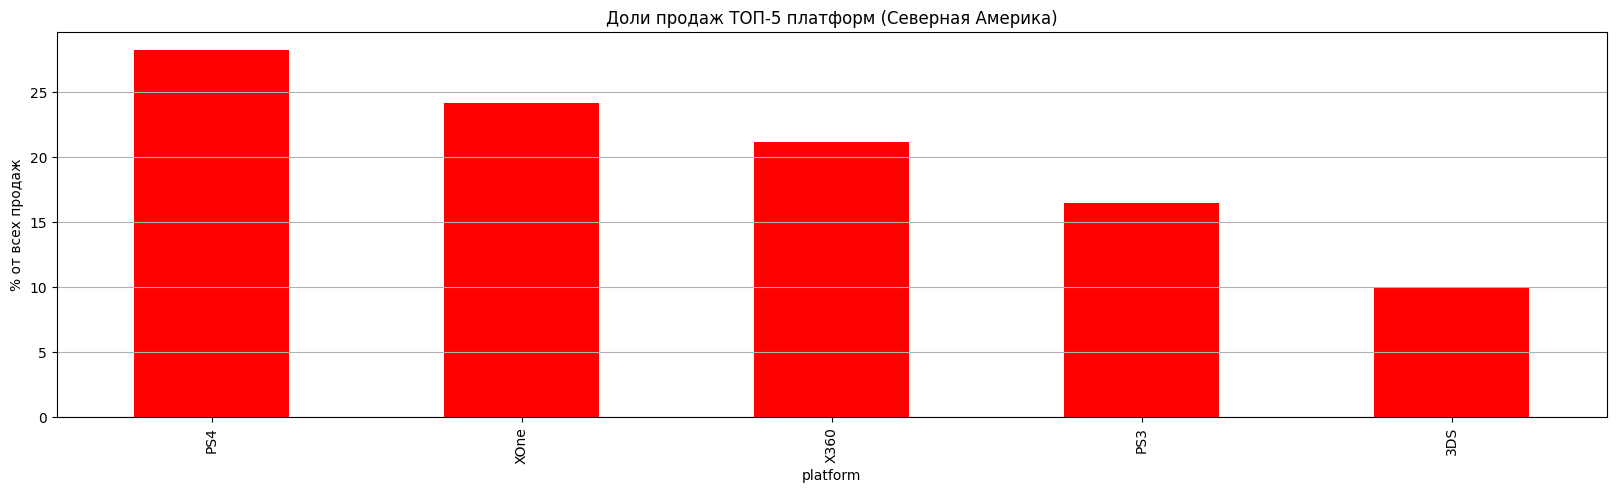

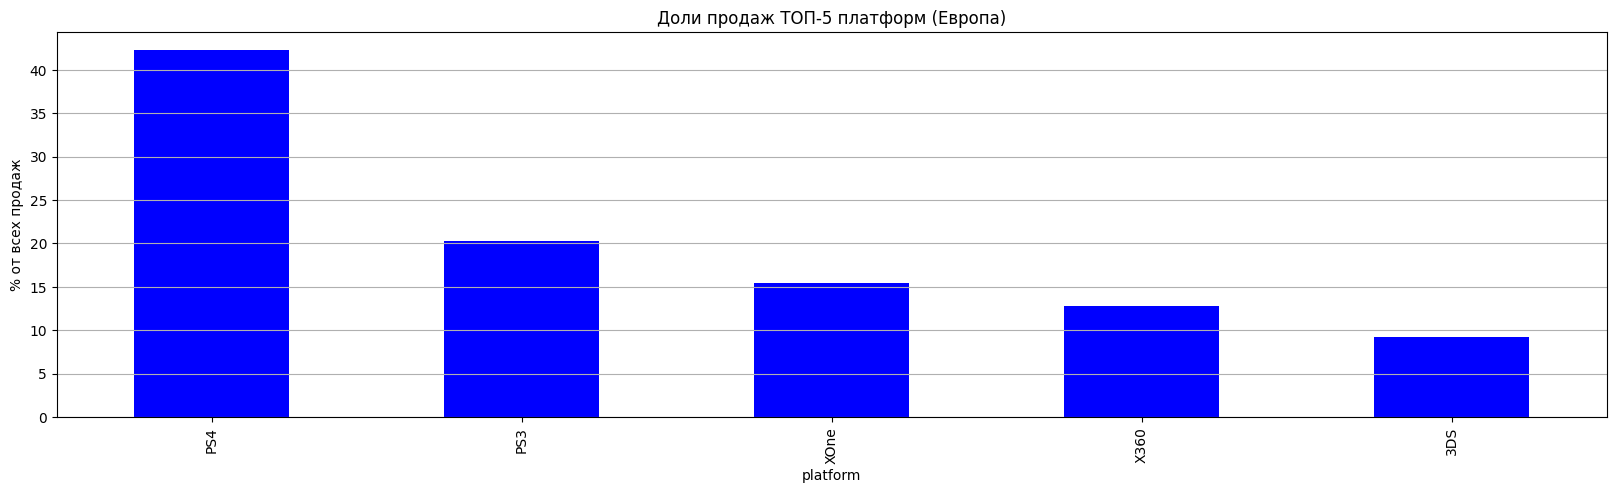

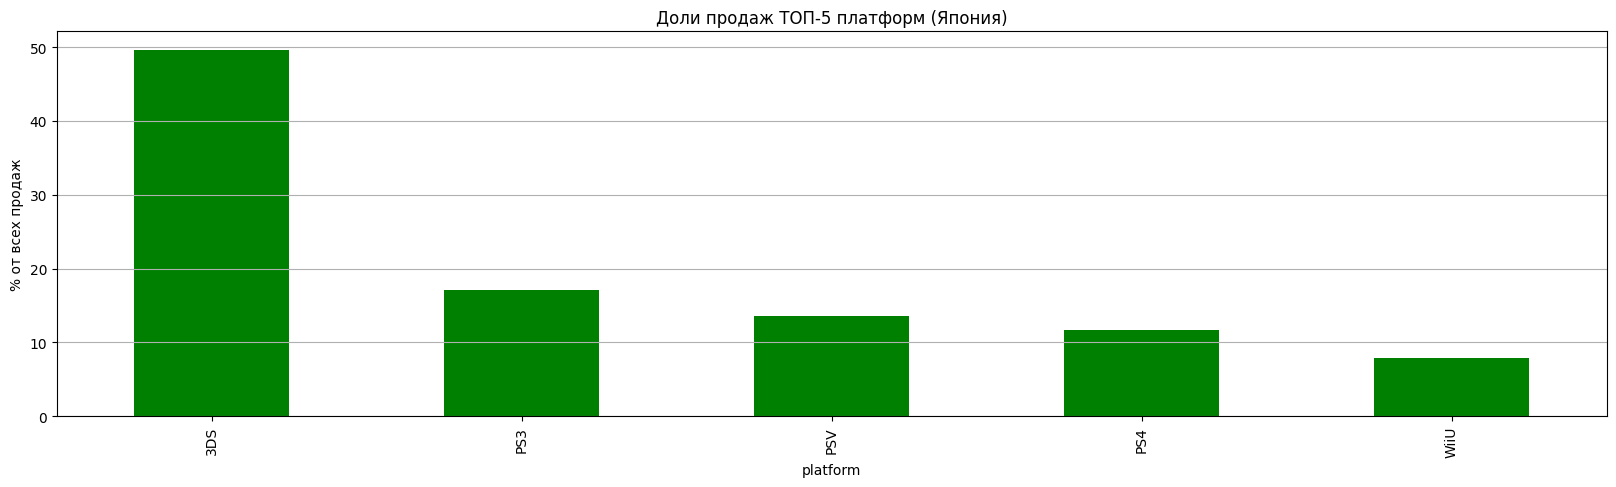

In [59]:
import matplotlib.pyplot as plt

regions = ['na_sales', 'eu_sales', 'jp_sales']
titles = ['Северная Америка', 'Европа', 'Япония']
colors = ['red', 'blue', 'green']

for i, region in enumerate(regions):
    top_platforms = df_current.groupby('platform')[region].sum().nlargest(5)
    sales_share = top_platforms / top_platforms.sum() * 100  

    
    sales_share.plot(kind='bar', color=colors[i], title=f'Доли продаж ТОП-5 платформ ({titles[i]})', ylabel='% от всех продаж')
    plt.grid(axis='y')
    plt.show()

Судя по графикам Пользователи из Северной Америки и Европы больше предпочитают PS4, однаков  Европе эта платформа настолько популярна, что занимает более 40% от общего числа продаж, в то время как в Северной Америке всего более 25%, а вторая платформа по популярности XOne занимает 24%. В Японии же самой популрной платформой является 3DS, и опережает остальные платформы более чем в два раза по продажам. Около 50%.

### Посмотрим на самые популярные жанры в регионах

In [60]:
top_genre_na = df_current.pivot_table(index='genre',values='na_sales', aggfunc='sum').reset_index().sort_values('genre', ascending=False).head(5)
top_genre_eu = df_current.pivot_table(index='genre',values='eu_sales', aggfunc='sum').reset_index().sort_values('genre', ascending=False).head(5)
top_genre_jp = df_current.pivot_table(index='genre',values='jp_sales', aggfunc='sum').reset_index().sort_values('genre', ascending=False).head(5)

print(top_genre_na)
print(top_genre_eu)
print(top_genre_jp)

           genre  na_sales
11      Strategy      3.13
10        Sports     65.12
9     Simulation      4.79
8        Shooter    109.74
7   Role-Playing     46.40
           genre  eu_sales
11      Strategy      4.13
10        Sports     59.63
9     Simulation     10.86
8        Shooter     87.86
7   Role-Playing     36.97
           genre  jp_sales
11      Strategy      1.75
10        Sports      4.91
9     Simulation      4.52
8        Shooter      6.61
7   Role-Playing     50.01


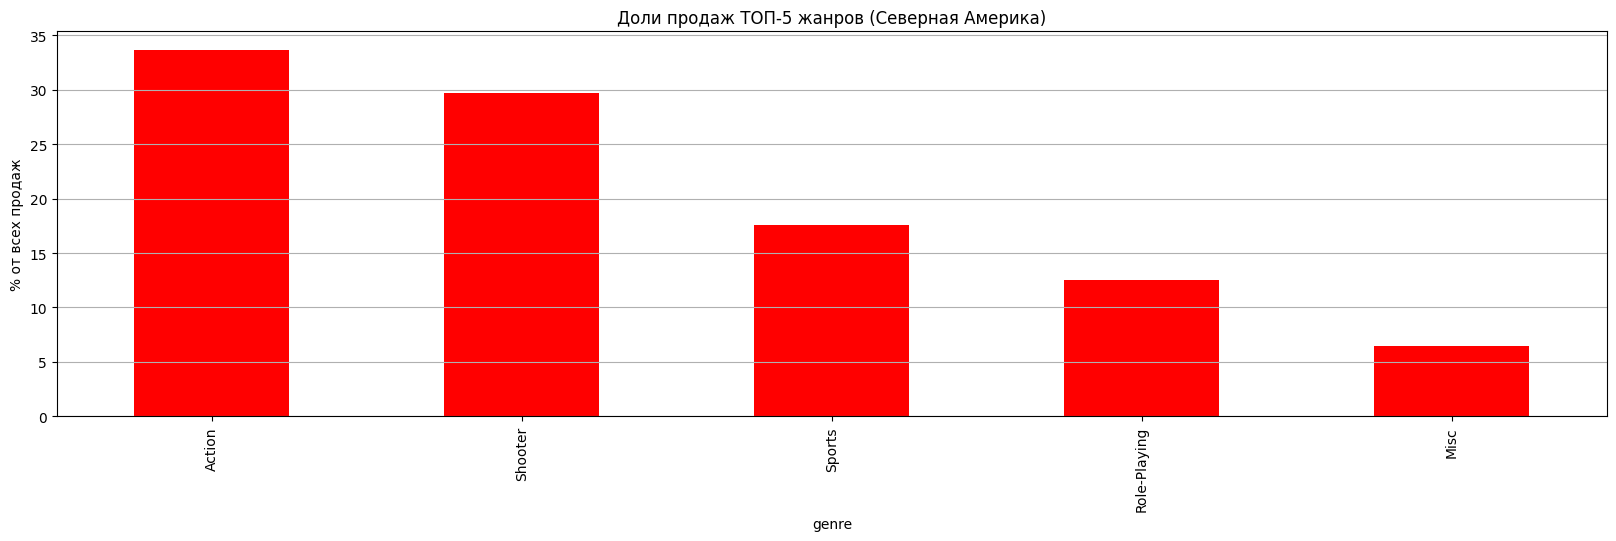

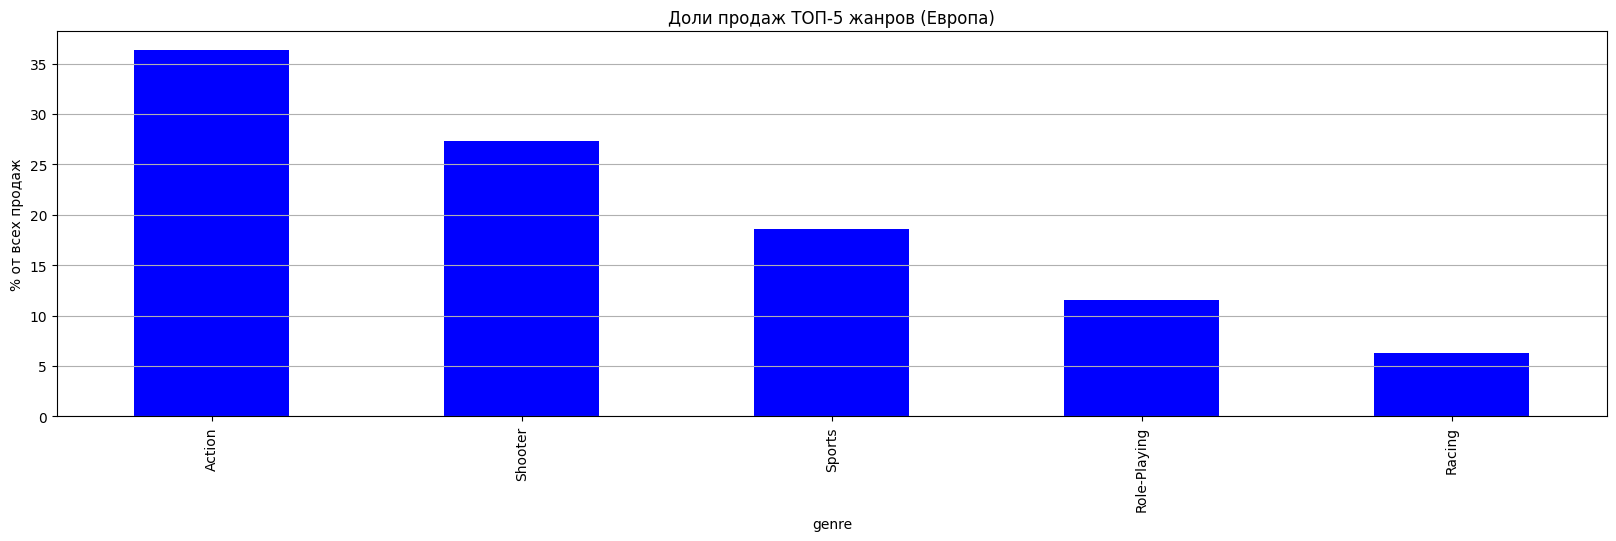

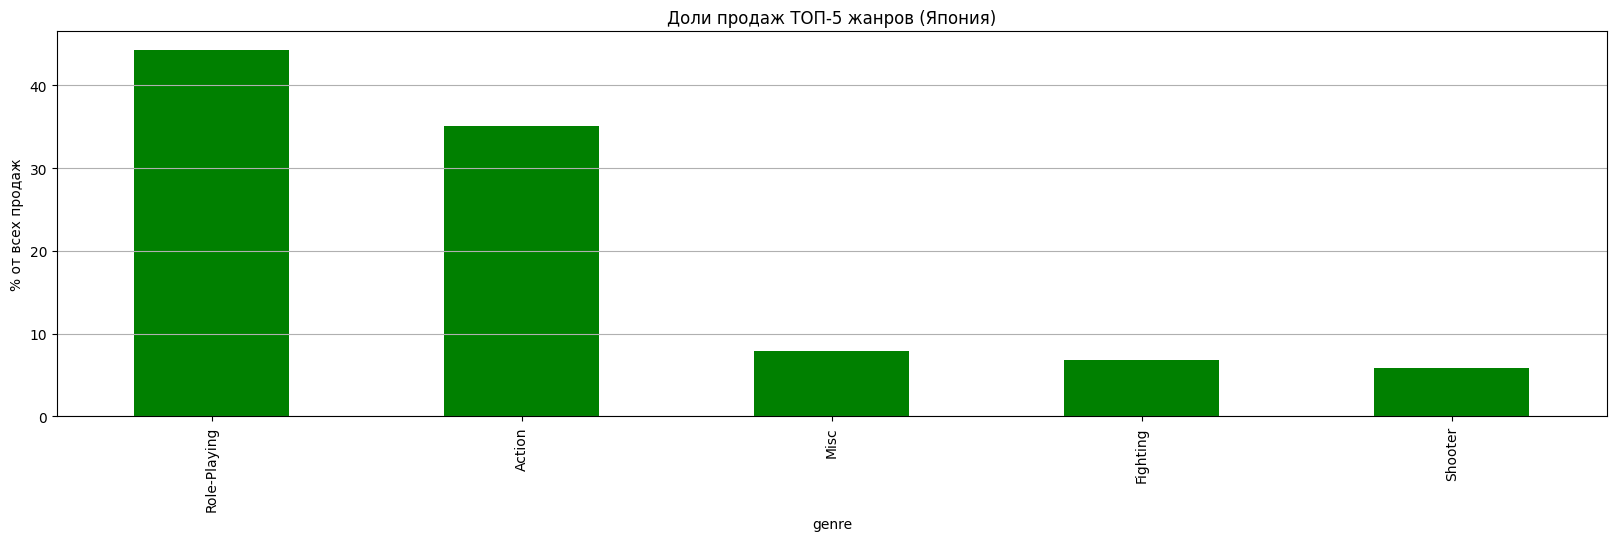

In [61]:
# Определяем ТОП-5 жанров и доли продаж в каждом регионе
regions = ['na_sales', 'eu_sales', 'jp_sales']
titles = ['Северная Америка', 'Европа', 'Япония']
colors = ['red', 'blue', 'green']

for i, region in enumerate(regions):
    top_genre = df_current.groupby('genre')[region].sum().nlargest(5)
    sales_share = top_genre / top_genre.sum() * 100  # Доли продаж

    # Строим график
    sales_share.plot(kind='bar', color=colors[i], title=f'Доли продаж ТОП-5 жанров ({titles[i]})', ylabel='% от всех продаж')
    plt.grid(axis='y')
    plt.show()

По графику видим что самым популярным жанром в Северной Америке и Европе это Shooter, второй по популярности Sports. В Японии же на первом месте жанр Role-playing, а второе место даже сложно выделить, ибо все остальные жанры не особо популярны. 

### Проверим влияет ли рейтинг ESRB на продажи в регионе. rating

In [62]:
reting_na = df_current.pivot_table(index='rating',values='na_sales', aggfunc='sum').reset_index().sort_values('rating', ascending=False)
reting_eu = df_current.pivot_table(index='rating',values='eu_sales', aggfunc='sum').reset_index().sort_values('rating', ascending=False)
reting_jp = df_current.pivot_table(index='rating',values='jp_sales', aggfunc='sum').reset_index().sort_values('rating', ascending=False)

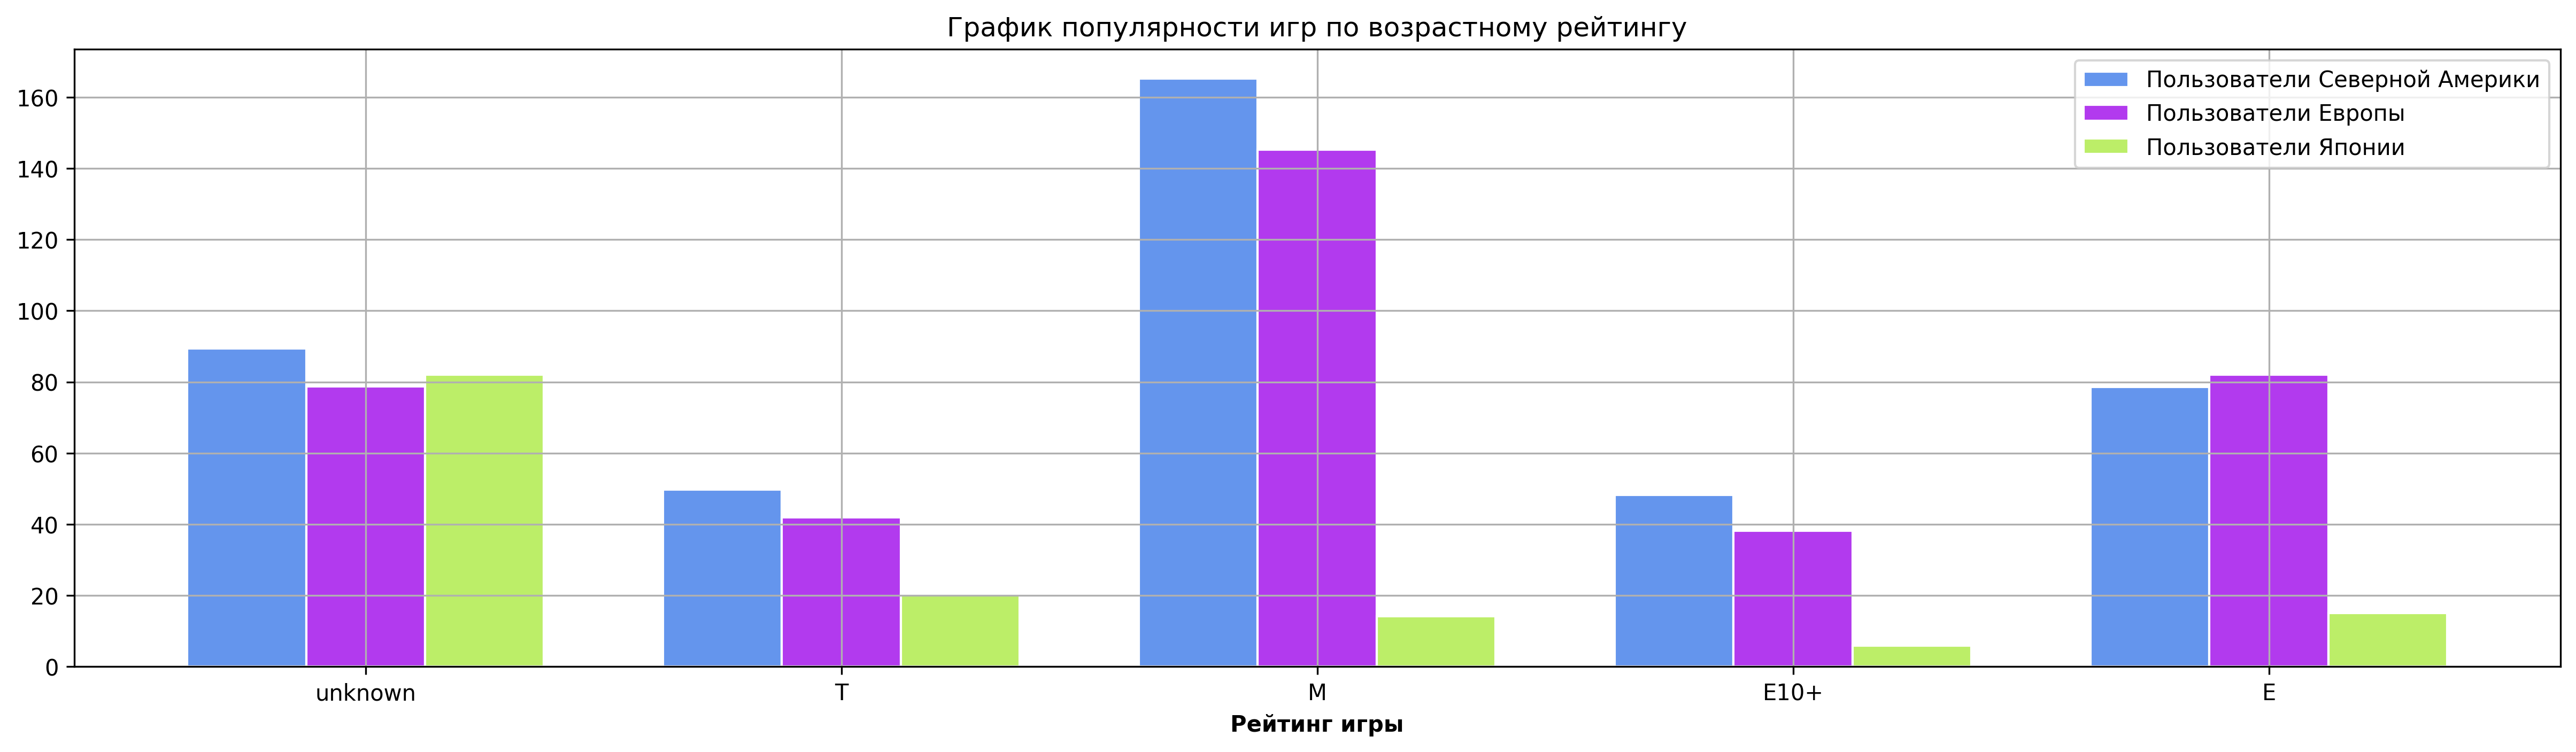

In [63]:
barWidth = 0.25
bars1 = reting_na['na_sales']
bars2 = reting_eu['eu_sales']
bars3 = reting_jp['jp_sales']

r = np.arange(len(bars1))
r2 = r + barWidth
r3 = r2 + barWidth

fig, ax = plt.subplots(dpi=300)
ax.bar(r, bars1, color='#6495ED', width=barWidth, edgecolor='white', label='Пользователи Северной Америки')
ax.bar(r2, bars2, color='#B23AEE', width=barWidth, edgecolor='white', label='Пользователи Европы')
ax.bar(r3, bars3, color='#BCEE68', width=barWidth, edgecolor='white', label='Пользователи Японии')
plt.title('График популярности игр по возрастному рейтингу')


ax.set_xlabel('Рейтинг игры', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(reting_na['rating'])
ax.grid()

ax.legend()
plt.show()

По возрастному рейтингу самый популярный рейтинг игр в Европе и Америке M ( 11-13 лет), за ним идет рейтинг Е(6+), в Японии же сложно выделить популярные игры по возрастному рейтингу, так как нет оценок.

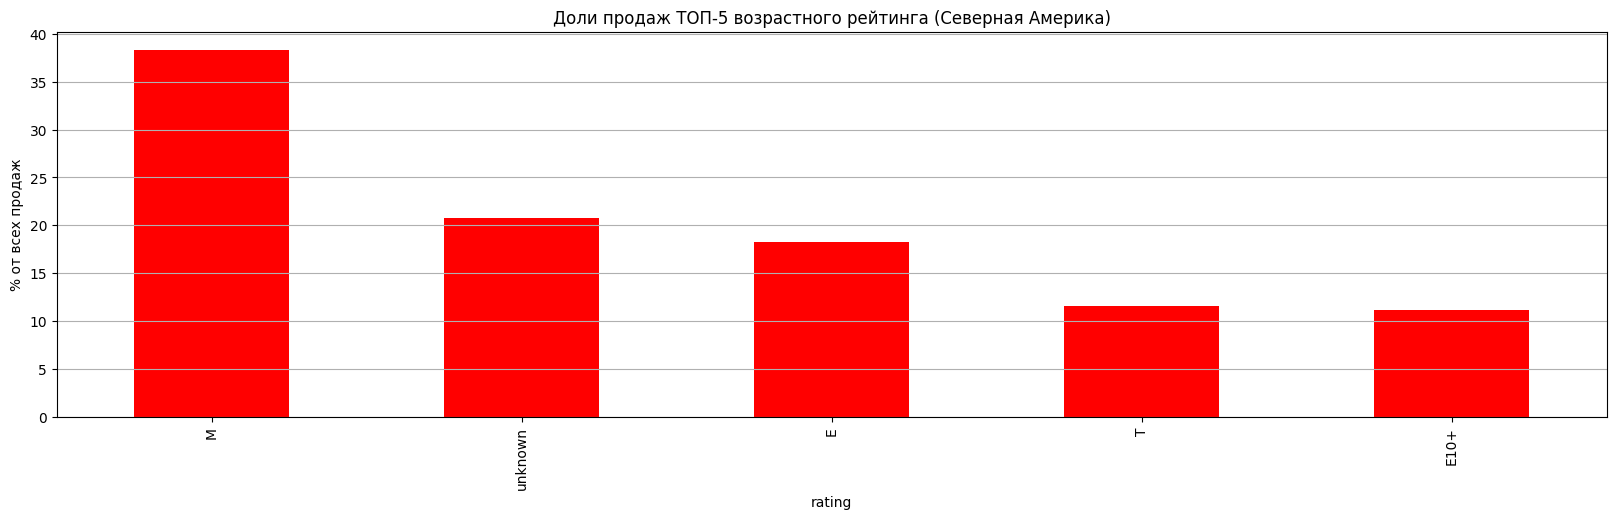

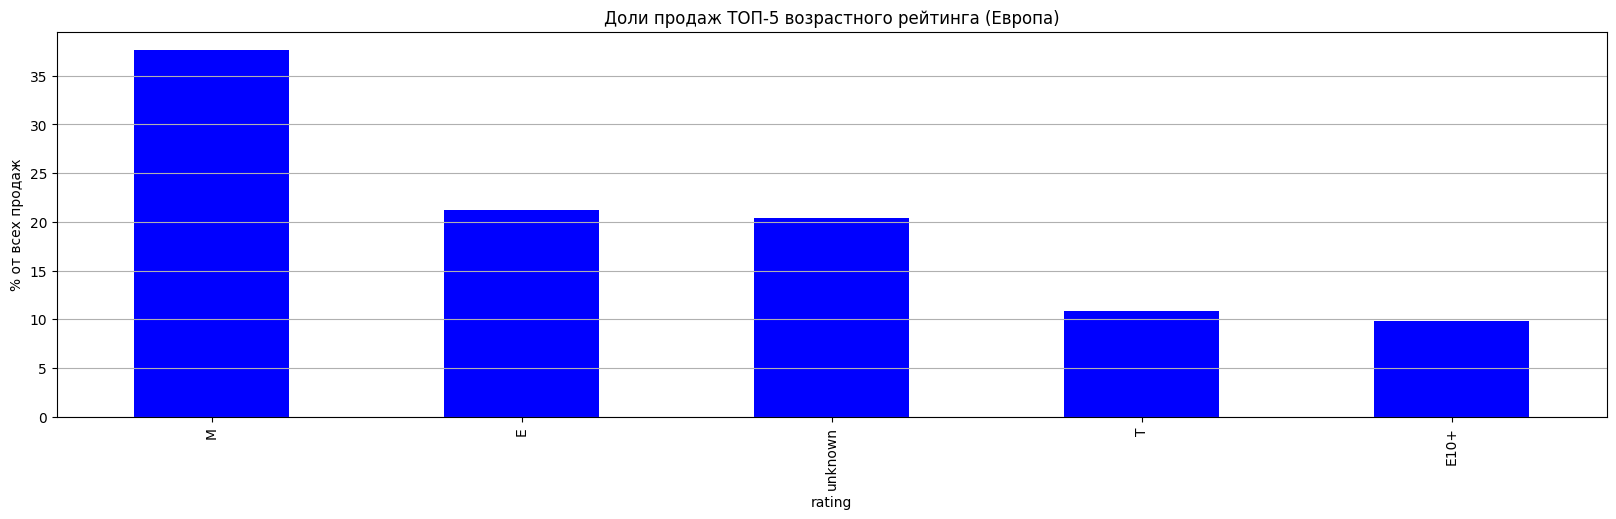

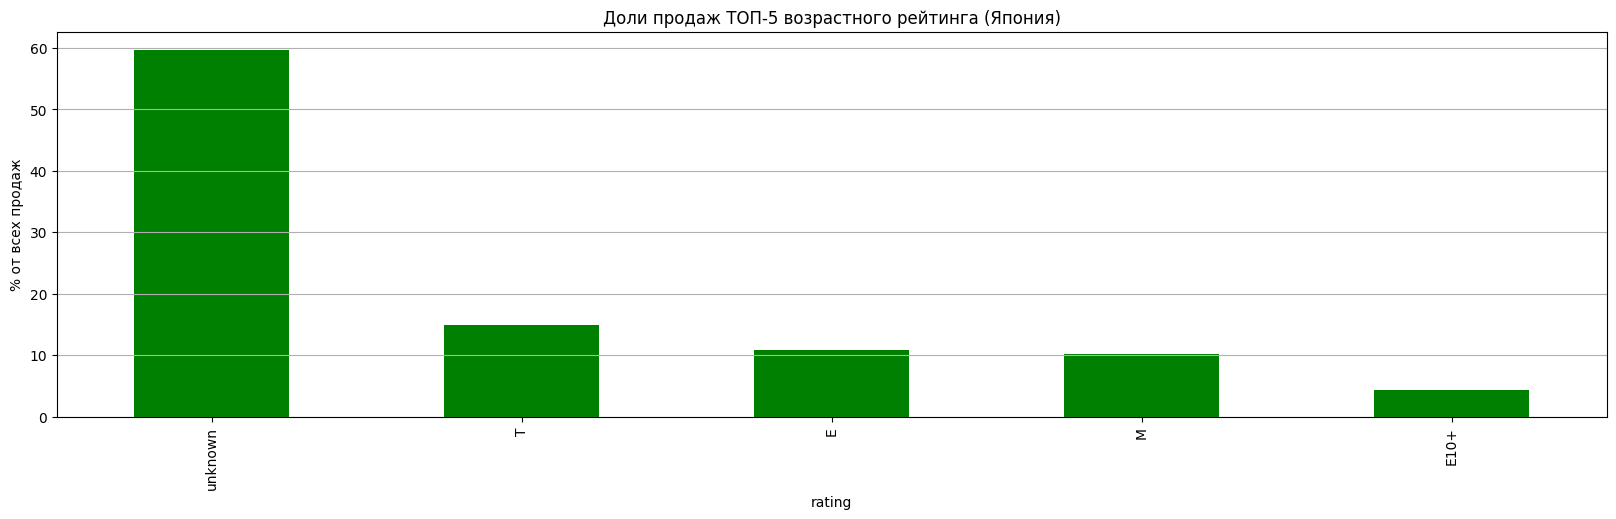

In [64]:
# Определяем ТОП-5 жанров и доли продаж в каждом регионе
regions = ['na_sales', 'eu_sales', 'jp_sales']
titles = ['Северная Америка', 'Европа', 'Япония']
colors = ['red', 'blue', 'green']

for i, region in enumerate(regions):
    top_rating = df_current.groupby('rating')[region].sum().nlargest(5)
    sales_share = top_rating / top_rating.sum() * 100  # Доли продаж

    # Строим график
    sales_share.plot(kind='bar', color=colors[i], title=f'Доли продаж ТОП-5 возрастного рейтинга ({titles[i]})', ylabel='% от всех продаж')
    plt.grid(axis='y')
    plt.show()

# Вывод по разделу:
1. Типичный игрок в Северной Америке играет с платформ PS4 или XOne c возрастный рейтингом M(11-13).
2. Типичный игрок в Европе играет с PS4, в тот же жанр, и такой же рейтинг.
3. Типичный игрок в Японии играет с платформы 3DS, в игры жанра Role-playing, с не известным возрастным рейтингом

## Проверим гипотезы

### Первая гипотеза:
Любая нулевая гипотеза строится на том, что какие то средние значения одной дисперсии(выборки) равны каким то значениям другой дисперсии(выборки), а альтернативная гипотеза задается из целей которые мы преследуем и что мы хотим выяснить, в данном случае:
H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [65]:
xone = df_current.query("platform == 'XOne'").dropna(subset=['user_score'])
pc = df_current.query("platform == 'PC'").dropna(subset=['user_score'])
print(xone)
print(pc)

      index                            name platform  year_of_release  \
22      165              Grand Theft Auto V     XOne             2014   
24      179  Call of Duty: Advanced Warfare     XOne             2014   
31      242               Halo 5: Guardians     XOne             2015   
39      270                       Fallout 4     XOne             2015   
54      373         Assassin's Creed: Unity     XOne             2014   
...     ...                             ...      ...              ...   
2094  16544     Assassin's Creed Chronicles     XOne             2016   
2109  16597     Saints Row: Gat out of Hell     XOne             2015   
2116  16630        Sébastien Loeb Rally Evo     XOne             2016   
2119  16643               Rugby Challenge 3     XOne             2016   
2126  16660                Prison Architect     XOne             2016   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
22          Action      2.81      2.19      

In [66]:
alpha = 0.05 # Уровень значимости выбираем между установленными от 1% до 10%

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'],
    equal_var=False, #для различных дисперсий так как в первой таблице 182 строк, а во второй 307.
    alternative='two-sided')

print(results.pvalue)
print(f"Среднее значение первой выборки = {xone['user_score'].mean()}")
print(f"Среднее значение второй выборки = {pc['user_score'].mean()}")

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Среднее значение первой выборки = 6.521428571428572
Среднее значение второй выборки = 6.2696774193548395
Не получилось отвергнуть нулевую гипотезу


По результам проверки гипотезы, можно сделать вывод, что средние оценки пользователей X360 и PC равны при установленной значимости 5%.

### Вторая гипотеза:
Формулировка гипотезы в данном варианте задается так же как и в предыдущем, мы выдвигает гипотезу о том что они равны, а альтернативной гипотезой будет, что они не равны.

HO - Средние пользовательские рейтинги жанров Action и Sports равны.\
H1 - Средние пользовательские рейтинги жанров Action и Sports разные.

In [67]:
action = df_current.query("genre == 'Action'").dropna(subset=['user_score'])
sports = df_current.query("genre == 'Sports'").dropna(subset=['user_score'])
print(xone)
print(pc)

      index                            name platform  year_of_release  \
22      165              Grand Theft Auto V     XOne             2014   
24      179  Call of Duty: Advanced Warfare     XOne             2014   
31      242               Halo 5: Guardians     XOne             2015   
39      270                       Fallout 4     XOne             2015   
54      373         Assassin's Creed: Unity     XOne             2014   
...     ...                             ...      ...              ...   
2094  16544     Assassin's Creed Chronicles     XOne             2016   
2109  16597     Saints Row: Gat out of Hell     XOne             2015   
2116  16630        Sébastien Loeb Rally Evo     XOne             2016   
2119  16643               Rugby Challenge 3     XOne             2016   
2126  16660                Prison Architect     XOne             2016   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
22          Action      2.81      2.19      

In [68]:
alpha = 0.05 # Уровень значимости выбираем между установленными от 1% до 10%

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var=False, #для различных дисперсий так как в первой таблице 182 строк, а во второй 307.
    alternative='two-sided')

print(results.pvalue)
print(f"Среднее значение первой выборки = {action['user_score'].mean()}")
print(f"Среднее значение второй выборки = {sports['user_score'].mean()}")

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

8.255856366160802e-20
Среднее значение первой выборки = 6.844329896907216
Среднее значение второй выборки = 5.261783439490445
Отвергаем нулевую гипотезу


По результам проверки гипотезы, можно сделать вывод, средние пользовательские рейтинги жанров Action и Sports разные при установленном уровне значимости в 5%.

# Общий вывод:
 
1. По результама предварительной обработки данных были убранны неизвестные данные(tbd), добавленна колонка с сумарными продажами по всем регионам, и изменнены некоторые форматы строк для удобства.
2. По результам исследовательского анализа данных выяснил, что самая прибыльная консольза все время PS2, хотя сейчас ее популярность упала почти до 0 в связи с выходом более новых моделей.
3. Средние показатели прибыли за последнеие 6 лет падают на всех платформах для игр.
4. Оценки пользователей не виляют на прибыль, а оценки критиков оказывают среднее влияние.
5. Самый прибыльный жанр игр Action, хотя игры жанра Shooter имеюю более высокие средние показатели по доходности.
6. Игроки в Европе и Северной Америке играют на одних и тех же платформ(X360), в один и тот же жанр игр(Shooter), и с одинаковым возрастным рейтингом M(11-13). Игроки Японии же предпочитают другую платформу(PSV) и другой жанр (Role-playing)
7. По результам проверки гипотезы выяснилось, что средние оценки пользователей X360 и PC равны.
8. По результам проверки гипотезы выяснилось, что средние пользовательские рейтинги жанров Action и Sports разные.